# Data Analysis

This data analysis is for: Toxic Comment Classification Challenge compeition in Kaggle

URL : https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge

Data files required can be downloaded from here: https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data

Download and save the data in ./data/ folder relative to this Jupyter notebook

## About Data
Description from the [kaggle website](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data):   
You are provided with a large number of Wikipedia comments which have been labeled by human raters for toxic behavior. The types of toxicity are and a comment can have more than 1 label:

toxic  
severe_toxic  
obscene  
threat  
insult  
identity_hate  

## Numerical Analysis

1. Read ./data/train.csv file
2. Counts no. of training data per class
3. A single comment can belong to multiple class


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_csv = './data/train.csv'

In [3]:
train_df = pd.read_csv(train_csv)

In [4]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
print(train_df.columns)
print(train_df.shape)

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')
(159571, 8)


In [6]:
# add a clean/non-toxic label colum
# for column from 2 to 7 (last) it has value 0 and 1,
# sum of col. 2 to 7 values for a particular row will result in no. of toxic classes for that row
rowsums=train_df.iloc[:,2:].sum(axis=1)
train_df['clean']=(rowsums==0)

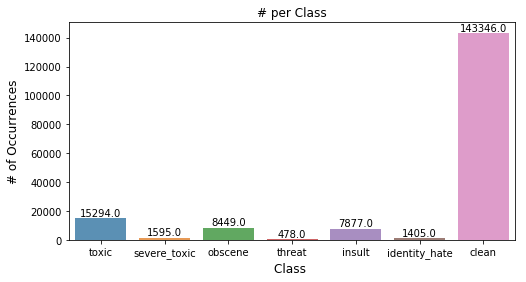

In [7]:
# plot bar chart for each class label
# get count for each class
x=train_df.iloc[:,2:].sum()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per Class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Class ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [8]:
pd.crosstab(train_df['clean'], train_df['toxic'])

toxic,0,1
clean,,
False,931,15294
True,143346,0


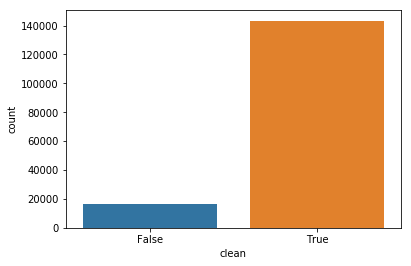

In [9]:
sns.countplot(x='clean', data=train_df)

### Observations:
From above analysis we see that:
1. Total no. of data (training & validation) = 159,571
2. Total non-toxic comments = 143,346 (~ 89.83%)
3. Rest 10.17% of commets has one of the toxic label
4. Some of labels like threat, identity_hate, severe_toxic has very less samples compared to other labels

So this is imbalanced dataset as we can observe that data per class is highly imbalanced